<a href="https://colab.research.google.com/github/Paolino1994/IntroIA/blob/main/Gu%C3%ADa%20de%20Ejercicios%202/PCA_MNIST_Guia_2_Ejercicio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA - MNIST

En éste ejercicio vamos a aplicar PCA y K-means al digits dataset similar a MNIST, que incluye imágenes de dígitos de 8x8 píxeles. La idea es intentar recopilar información sobre la distribución de las imágenes, usando visualizaciones que permitan clarificar cómo interpretar los resultados obtenidos por PCA.

### Importamos librerías

In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import os
import gzip
import sys
import pandas as pd
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import normalize 
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
import plotly.express as px

In [2]:
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

### Importamos el dataset

In [3]:
# Cargamos los datos de training
X, y = load_digits(return_X_y=True)
print('Formato del dataset: {}'.format(X.shape))

Formato del dataset: (1797, 64)


In [4]:
print('Formato de las etiquetas: {}'.format(y.shape))

Formato de las etiquetas: (1797,)


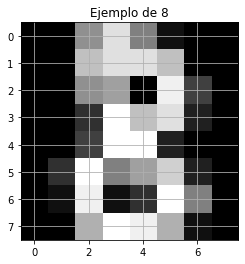

In [5]:
# Cargamos una muestra
plt.grid(True)
plt.title("Ejemplo de {}".format(y[8]))
plt.imshow(X[8, :].reshape((8, 8)), cmap='gray')

---

## Consignas

Siguiendo los ejemplos vistos en clase sobre los datasets de Human Activity Recognition y Fashion MNIST, realizar las siguientes consignas:

1. Aplicar PCA sobre el dataset para poder explicar el 90% de la varianza. ¿Cuántos componentes se requieren?
2. Graficar un scree plot (varianza contemplada en función del número de componentes considerados)
3. Visualizar gráficamente los primeros 5 componentes ¿Qué conclusiones se puede sacar de cada componente? [OPCIONAL].
4. Visualizar la imagen original vs. la reconstruida con los $m$ componentes del punto 1.
5. Graficar una matriz de correlación del dataset reducido.
6. Graficar los clusters de dígitos en 2 y 3 dimensiones usando los componentes obtenidos en PCA.
7. Aplicar K-means para clusterizar los dígitos ¿Cómo son los resultados?
8. Realizar un gráfico de inercia para obtener el número óptimo de clusters $k$.
9. Analizar visualmente los límites del cluster de algún dígito y "generar" artificialmente el dígito dándole valores a los primeros dos componentes de PCA.

In [6]:
X=normalize(X)
df = pd.DataFrame(data=X)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.004858,0.084253,0.191867,0.191929,0.093664,0.022048,0.002097,0.000085,0.032136,...,0.060411,0.003288,0.000009,0.004462,0.089965,0.196249,0.191290,0.109463,0.033396,0.005874
std,0.0,0.014439,0.076587,0.068796,0.069493,0.092147,0.053896,0.016695,0.001432,0.051392,...,0.079979,0.015487,0.000379,0.014890,0.082415,0.071832,0.080624,0.095899,0.066124,0.029949
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.015215,0.162136,0.158089,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.014996,0.169079,0.159124,0.000000,0.000000,0.000000
50%,0.0,0.000000,0.066418,0.211931,0.212459,0.064059,0.000000,0.000000,0.000000,0.000000,...,0.014801,0.000000,0.000000,0.000000,0.072346,0.217479,0.219044,0.095600,0.000000,0.000000
75%,0.0,0.000000,0.146161,0.240472,0.242285,0.176594,0.000000,0.000000,0.000000,0.052287,...,0.114082,0.000000,0.000000,0.000000,0.156622,0.245371,0.246866,0.195924,0.030831,0.000000
max,0.0,0.128267,0.291973,0.318349,0.318349,0.305275,0.290861,0.236325,0.030722,0.255264,...,0.302588,0.200523,0.016050,0.140849,0.291973,0.311164,0.313124,0.310636,0.302588,0.269298


In [7]:
#Aplicar PCA sobre el dataset para poder explicar el 90% de la varianza. ¿Cuántos componentes se requieren?

components=len(X[0])
PCAModel = PCA(n_components=components)
PCAModel.fit_transform(X);
elementsRequired=[]
values=PCAModel.singular_values_
finalComponents=0
for i in range(0,components):
  value=sum(values[0:i])/sum(values)
  elementsRequired.append(value)
  if value > .9:
    sw=False
    finalComponents=i
    print("Con "+str(i)+" de "+str(components)+" componentes puedo obtener el 90 porciento de la varianza")
    break





Con 37 de 64 componentes puedo obtener el 90 porciento de la varianza


Text(0.5, 1.0, 'Varianza contemplada en función del número de componentes considerados')

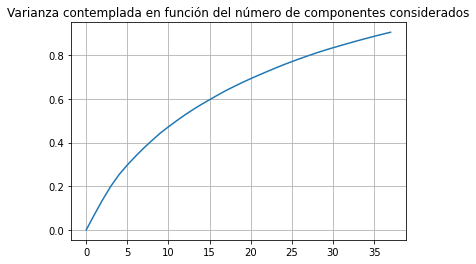

In [8]:
#Graficar un scree plot (varianza contemplada en función del número de componentes considerados)
plt.plot(elementsRequired)
plt.grid()
plt.title("Varianza contemplada en función del número de componentes considerados")


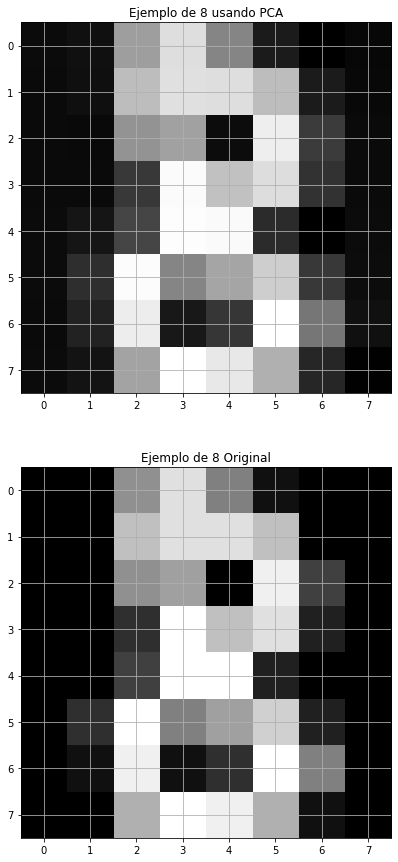

In [9]:
PCAFinal = PCA(n_components=finalComponents)
imagenReformada=PCAFinal.fit_transform(X)
proyeccion=PCAFinal.inverse_transform(imagenReformada)
figure, axis = plt.subplots(2,figsize=(15, 15))
axis[0].grid(True)
axis[0].title.set_text("Ejemplo de {} usando PCA".format(y[8]))
axis[0].imshow(proyeccion[8, :].reshape((8, 8)), cmap='gray')
axis[1].grid(True)
axis[1].title.set_text("Ejemplo de {} Original".format(y[8]))
axis[1].imshow(X[8, :].reshape((8, 8)), cmap='gray')


(37, 37)


<Figure size 1800x1800 with 0 Axes>

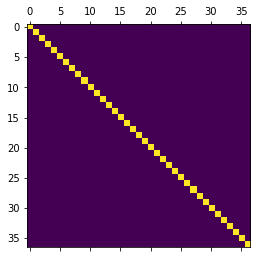

(1797, 37)

In [10]:
#Graficar una matriz de correlación del dataset reducido.
corr_df = np.corrcoef(imagenReformada.T)
print(corr_df.shape)
plt.figure(figsize=(25,25))
plt.matshow(corr_df)
plt.show()
imagenReformada.shape


In [11]:
#Graficar los clusters de dígitos en 2 y 3 dimensiones usando los componentes obtenidos en PCA.
digitos=[2,3]
#figure, axis = plt.subplots(len(digitos),figsize=(15, 15))
for i,digit in enumerate(digitos):
  PCALocal = PCA(n_components=digit)
  imagenReformada=PCALocal.fit_transform(X)
  columnas=[i for i in range(0,digit)]
  mapa=pd.DataFrame(imagenReformada,columns=columnas)
  mapa['ValorEsperado'] = y.tolist()
  figure= px.scatter(mapa, x=0, y=1, color=mapa['ValorEsperado'])
  figure.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



[ 0.02215524  0.00153317  0.3584879  -0.14593482  0.26482338 -0.21789378
 -0.0472558   0.087764   -0.30574059 -0.01958638] [-0.  7.  4.  2.  6.  9.  5.  1.  3.  8.]
[ 0.3584879  -0.01958638 -0.14593483  0.02215524 -0.0472558   0.00153316
 -0.30574059 -0.21789378  0.26482338  0.087764  ] [ 4.  8.  2. -0.  5.  7.  3.  9.  6.  1.]


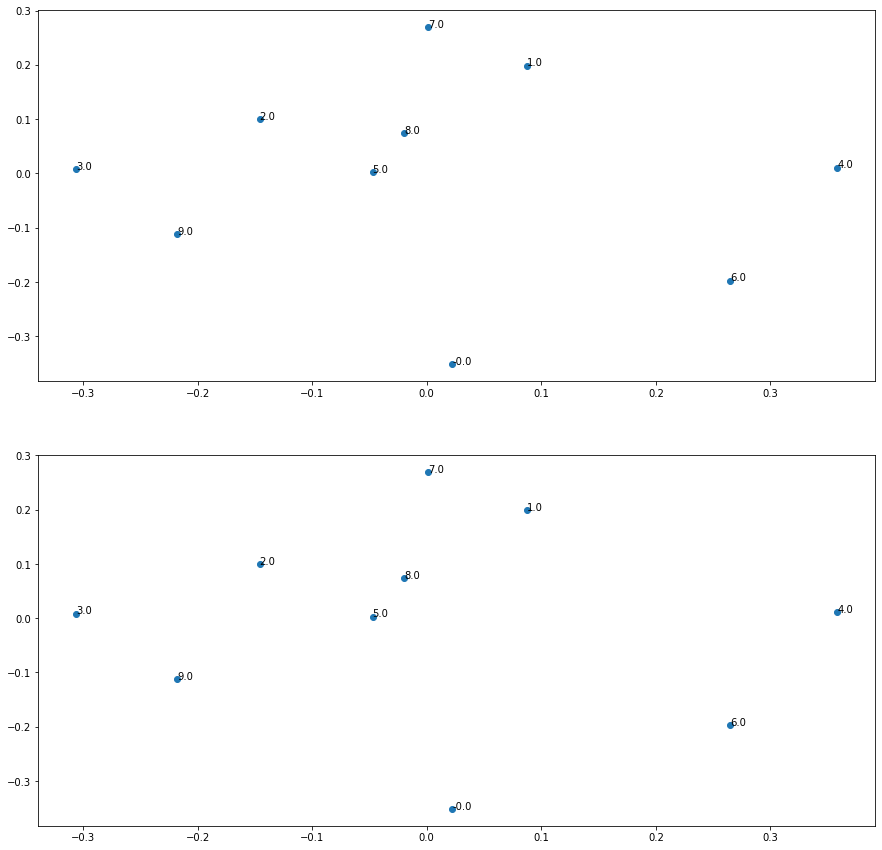

In [12]:
#Aplicar K-means para clusterizar los dígitos ¿Cómo son los resultados?
digitos=[2,3]
figure, axis = plt.subplots(len(digitos),figsize=(15, 15))


for i,digit in enumerate(digitos):
  PCALocal = PCA(n_components=digit)
  imagenReformada=PCALocal.fit_transform(X)  
  columnas=[i for i in range(0,digit)]
  mapa=pd.DataFrame(imagenReformada,columns=columnas)
  mapa['ValorEsperado'] = y.tolist()
  kmeans = KMeans(n_clusters=10)
  nuevosY=kmeans.fit_predict(mapa)
  centroides=kmeans.cluster_centers_  
  Xs=centroides[:, 0]
  Ys=centroides[:, 1]
  #Ver la tercera dimension, porque seguro en X e Y no se mueve, pero en Z si, buscar como imprimir en matplotlib
  valores=centroides[:, digit].round(1)  
  axis[i].scatter(Xs, Ys);
  print(Xs, valores)
  for j, txt in enumerate(range(0,10)):
    axis[i].annotate(valores[j], (Xs[j], Ys[j]))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names o

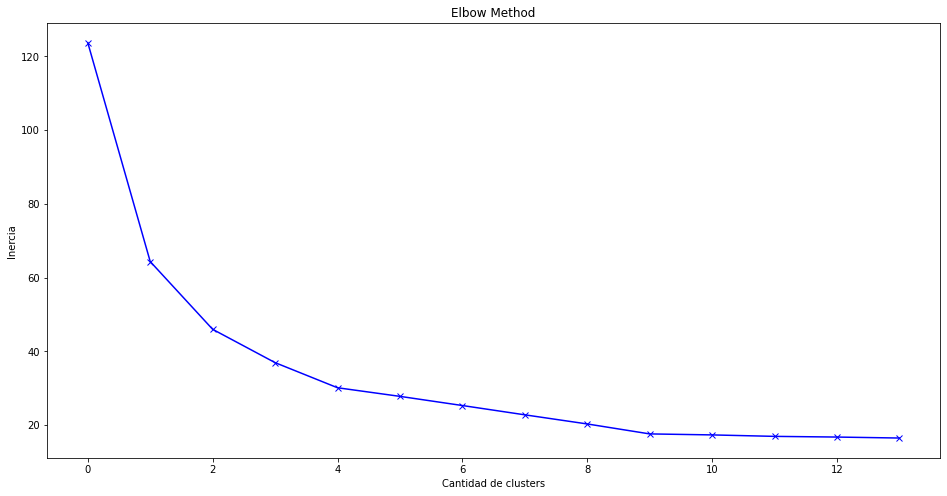

In [13]:
#Realizar un gráfico de inercia para obtener el número óptimo de clusters $k$.
PCALocal = PCA(n_components=finalComponents)
X
imagenReformada=PCALocal.fit_transform(X)  
columnas=[i for i in range(0,finalComponents)]
mapa=pd.DataFrame(imagenReformada,columns=columnas)
mapa['ValorEsperado'] = y.tolist()
listOfInertias=[]
#https://predictivehacks.com/k-means-elbow-method-code-for-python/
for i in range(1,15):
  kmeans = KMeans(n_clusters=i)
  nuevosY=kmeans.fit_predict(mapa)
  listOfInertias.append(np.sqrt(kmeans.inertia_))

plt.figure(figsize=(16,8))
plt.plot(listOfInertias, 'bx-')
plt.xlabel('Cantidad de clusters')
plt.ylabel('Inercia')
plt.title('Elbow Method')
plt.show()
#Los clusters ideales deberian ser 10, tratar de analizar el D para ver porque

In [14]:
d = {}
for k in range(1, 14):
    i = k - 1
    d[k] = (listOfInertias[i] - listOfInertias[i + 1]) / (listOfInertias[i - 1] - listOfInertias[i])

print(d)

{1: -0.5536089264806887, 2: 0.30957752578556397, 3: 0.4918373402708795, 4: 0.7534682603829612, 5: 0.3433311480287126, 6: 1.0626367275383737, 7: 1.0153937463417084, 8: 0.9813888234877159, 9: 1.0903892729871039, 10: 0.10054118925866075, 11: 1.4601831664940284, 12: 0.46660007677721616, 13: 1.4344773023894037}


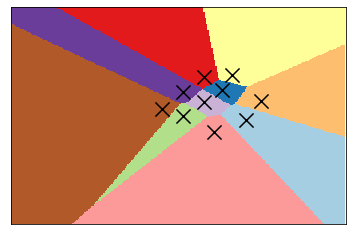

In [27]:
#Analizar visualmente los límites del cluster de algún dígito y "generar" artificialmente el dígito dándole valores a los primeros dos componentes de PCA
#Generar->Suma ponderada usando la primeras 2 componentes, hacer un CL de esos 2 componentes para calcular y comparar con la de 37 componentes
#https://datascience.stackexchange.com/questions/53918/is-there-a-way-to-put-a-separate-line-between-clusters-for-k-means-clustering
n_digits=10
PCALOCAL = PCA(n_components=2).fit_transform(X)
kmeans = KMeans(n_clusters=10)
kmeans.fit(PCALOCAL)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = PCALOCAL[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = PCALOCAL[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
       extent=(xx.min(), xx.max(), yy.min(), yy.max()),
       cmap=plt.cm.Paired,
       aspect='auto', origin='lower')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
        marker='x', s=200, linewidths=3,
        color='black', zorder=10)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()